# Data transformation(salary)

## 1. Data Merge (데이터 병합)

In [93]:
import pandas as pd
import numpy as np

In [94]:
# pd.concat() : 데이터테이블을 위아래로 합치는 함수
# pd.concat(테이블a, 테이블b, 테이블c)
# 가로로 붙이고 싶으면 뒤에 , axis =1 추가 (key값 기준x)
# pd.concat(테이블a, 테이블b, 테이블c, axis = 1)


# 테이블a.merge(테이블b)
# merge는 inner join을 기본으로함 (중복되는 부분만을 기준으로 합쳐버림, 안겹치는 부분은 걍 없어짐)
# outer join은 안겹쳐지는 부분도 합치고, 각각에 없는 데이터는 null값으로 출력
# key값 기준으로 합침, 특정 컬럼 기준으로 합칠 수 있음

# 테이블a.merge(테이블b, on = 'key')
# 아무 정의 없이 merge를 쓰면 공통된 컬럼을 다 찾아서 모든게 완벽히 일치하는 값만 출력
# on = ''을 추가해서 키값을 기준으로 머지하면 그 값을 기준으로 양쪽 컬럼의 모든값을 다 가져옴

# 테이블a.merge(테이블b, on = 'key', how = 'left')
# 왼쪽 테이블의 key값을 기준으로 오른쪽 테이블의 값들 가져옴

# left join: 왼쪽 테이블 기준으로 왼쪽 테이블 키값 기준으로 데이터를 합침
# 테이블a.merge(테이블b, how = 'outer')
# 테이블a.merge(테이블b, how = 'right')


In [95]:
# 두 테이블에서 컬럼 데이터는 같은데 컬럼명이 다르게 세팅되어 있을 경우
# 1. 데이터 프레임의 컬럼이름 변경(rename)
# 2. 테이블명.merge(테이블명b, left_on = '왼쪽테이블에서 원하는 컬럼', right_on = '오른쪽 데이터에서 원하는 컬럼', how = 'outer')

# 3. join 사용해서 데이터 합치기 (디폴트는 left, 아우터, 이너로 바꾸고 싶으면 how = 'outer' 추가)
# 테이블a.join(테이블b, lsuffix = '_a', rsuffix = '_b')
# 결과가 concat처럼 나옴, 왜냐면 join은 인덱스를 기준으로 합치기 때문
# key값 기준으로 합치고 싶으면 그걸 인덱스에 넣어줘야함
# 테이블a.set_index('key값으로 세팅하고 싶은 컬럼')


# 노드 설명
① merge와 join의 특징에 대해 더 알아 봅시다.

merge의 경우 공통된 컬럼이 있으면 suffix를 자동 생성합니다. 동일한 이름의 컬럼을 구별하기 위해 사용됩니다.
join의 경우 공통된 컬럼이 있으면 suffix 수동 생성이 필요합니다. 데이터 세트간의 컬럼 이름 충돌을 해결합니다.
② pandas에서는 merge 함수를 사용하여 SQL 스타일의 조인을 수행할 수 있습니다.

Inner join: 공통키 반환 (*merge의 기본 설정)
Left join: 왼쪽, 모든 행, 오른쪽 일치 행 반환
Right join: 오른쪽, 모든 행, 왼쪽 일치 행 반환
Outer join: 두 행을 반환, 불일치 NaN 값으로 채워짐

In [96]:
salary_1 = pd.read_csv('/aiffel/data/salary_1.csv')
salary_2 = pd.read_csv('/aiffel/data/salary_2.csv')

In [97]:
salary_1.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0


In [98]:
salary_2.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,29,Female,1,Human Resources Coordinator,2,45000,China,Chinese,0
1,23,Male,0,Sales Associate,1,25000,USA,Asian,0
2,32,Female,2,Software Developer,7,90000,USA,African American,0
3,44,Male,1,Operations Manager,18,170000,USA,Hispanic,0
4,26,Female,1,Marketing Coordinator,2,40000,Canada,Asian,0


# 데이터 병합!!!!!!!!!!!!!!!

In [99]:
# 두개의 데이터 테이블 합쳐주고 salary_df라는 이름으로 저장해주기
salary_df = pd.concat([salary_1, salary_2])

In [100]:
salary_df

# 총 6684행인데, 인덱스를 보면 2684에서 끝나는걸 알 수 있음
# concat으로 합치면 인덱스가 그냥 그대로 합쳐져서 0부터 숫자가 다 2개씩 들어가 있을거임

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
2680,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0
2681,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0
2682,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0
2683,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0


In [101]:
# loc를 사용해서 인덱스가 중복되어 있는지 확인 가능
salary_df.loc[0]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
0,29.0,Female,1,Human Resources Coordinator,2.0,45000,China,Chinese,0


In [102]:
# 인덱스를 중복되지 않게 0부터 다시 붙여주기
salary_df.reset_index()

# 기존 인덱스는 index라는 컬럼명으로 옮겨지고, 0부터 새로운 인덱스 생성됨

,index,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,4,52.0,Male,2,Director,20.0,200000,USA,Asian,0
...,...,...,...,...,...,...,...,...,...,...
6679,2680,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0
6680,2681,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0
6681,2682,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0
6682,2683,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0


In [103]:
# 옆으로 옮겨진 index컬럼은 딱히 필요 없으니 drop으로 지워도 되고
# reset_inex안에 drop = true 추가하여 지울 수도 있음
# salary_df.reset_index(drop=True)

# 변경된 데이터를 salary_df = 으로 대체해도 되고, 리셋 인덱스 안에서 inplace로 한줄에 처리할 수도 있음
salary_df.reset_index(drop = True, inplace = True)

In [104]:
salary_df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0
...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0


In [105]:
# 연봉은 국가별로도 크게 차이남
# 뭔가 조금 더 유의미한 데이터 분석을 하기위해 '국가별 물가지수'랑 같이 보면 좋지 않을까? 라는 생각에 데이터를 하나 더 준비했음
# 국가별 cpi 데이터 불러오고 cpi라는 이름으로 저장

pd.read_csv('/aiffel/data/cpi.csv')
cpi = pd.read_csv('/aiffel/data/cpi.csv')

In [106]:
cpi.head()

,Country,Reference,Last,Previous,Units,Frequency
0,United States,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
1,China,Sep-23,100,100.1,"Index CPPY=100, NSA",Monthly
2,Germany,Sep-23,117.9,117.5,"Index 2020=100, CDASA",Monthly
3,France,Sep-23,118.52,118.2,"Index 2015=100, SA",Monthly
4,United Kingdom,Sep-23,132,131.3,"Index 2015=100, NSA",Monthly


In [107]:
# cpi값을 아까 테이블에 국가별로 매칭해서 합치기
# join을 쓰려면 country라는 컬럼을 인덱스로 설정하는 귀찮음이 발생하기 때문에 그냥 merge 사용

# 근데 두 테이블에 국가명이 좀 다르게 설정되어 있는 것을 알 수 있음 (ex. 미국 = united states, usa, america...)4
# 그래서 각 데이터프레임에 국가들이 어떤 이름으로 정리되어 있는지 확인 및 불일치값 통일하는 작업 필요

# 먼저 salary 데이터에 국가가 어떻게 쓰여있는지 확인
salary_df['Country'].unique()

array(['UK', 'USA', 'Canada', 'China', 'Australia'], dtype=object)

In [108]:
# cpi 데이터에 국가가 어떻게 쓰여있는지 확인
cpi['Country'].unique()

# 국가가 좀 많이 나오는데, 다 볼 필요 없고, 
# 1. 위에 salary에 있는 국가들이 있는지
# 2. 명칭이 같은지, 다르면 어떻게 다른지 확인

array(['United States', 'China', 'Germany', 'France', 'United Kingdom',
       'Brazil', 'Italy', 'Russian Federation', 'Canada', 'Australia',
       'Spain', 'South Korea', 'Mexico', 'Indonesia', 'Netherlands'],
      dtype=object)

In [109]:
# UK, USA만 값이 다른다는 사실 확인 완료, 두국가명을 각각 값 하나의 명칭으로 통일 시켜주기
cpi['Country'].replace({'United States': 'USA', 'United Kingdom': 'UK'})

0                    USA
1                  China
2                Germany
3                 France
4                     UK
5                 Brazil
6                  Italy
7     Russian Federation
8                 Canada
9              Australia
10                 Spain
11           South Korea
12                Mexico
13             Indonesia
14           Netherlands
Name: Country, dtype: object

In [110]:
# 데이터 잘 바뀌었는지 확인 후 cpi['Country'] 라는 이름으로 데이터 업데이트
cpi['Country'] = cpi['Country'].replace({'United States': 'USA', 'United Kingdom': 'UK'})

In [111]:
# 이제 국가 이름이 완전히 일치되었으니 KEY값으로 쓸 수 있음~

salary_df.merge(cpi, on = 'Country', how = 'left')

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Reference,Last,Previous,Units,Frequency
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,Sep-23,132,131.3,"Index 2015=100, NSA",Monthly
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,Sep-23,158.7,158.4,"Index 2002=100, SA",Monthly
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,Sep-23,307.48,306.27,"Index 1982-84=100, SA",Monthly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0,Sep-23,132,131.3,"Index 2015=100, NSA",Monthly
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0,2023 Q3,135.3,133.7,"Index FY 2012=100, NSA",Quarterly
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0,Sep-23,100,100.1,"Index CPPY=100, NSA",Monthly
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0,Sep-23,100,100.1,"Index CPPY=100, NSA",Monthly


In [112]:
# 데이터 잘 합쳐졌으면 salary_df라는 이름으로 덮어씌우기

salary_df = salary_df.merge(cpi, on = 'Country', how = 'left')

In [113]:
# 불필요한 컬럼 정리 (cpi 데이터에서 last 빼고 다른 컬럼 다 지우기)

salary_df.drop(['Reference', 'Previous', 'Units', 'Frequency'], axis = 1)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Last
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0,132
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0,135.3
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0,100
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0,100


In [114]:
# 데이터 이상 없으면 inplace = True 추가해서 덮어씌우기
salary_df.drop(['Reference', 'Previous', 'Units', 'Frequency'], axis = 1, inplace = True)

In [115]:
# 잘 정리되었는지 확인
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,Last
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


In [116]:
# last 컬럼이 의미하는 바를 한눈에 알기 어려우므로 컬럼명 변경

salary_df.rename({'Last': 'CPI'}, axis = 1)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0,132
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0,135.3
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0,100
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0,100


In [117]:
# 잘 바뀌었으면 salary_df로 덮어씌우기
salary_df = salary_df.rename({'Last': 'CPI'}, axis = 1)

In [118]:
# head 최종 확인
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.7
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


# 결측치&이상치!!!!!!!!!!!!!!!!

In [119]:
# 각 컬럼별 null값 얼마나 있는지, 데이터 타입은 뭔지 확인해보기
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6684 entries, 0 to 6683
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6680 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   int64  
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
 9   CPI                  6684 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 574.4+ KB


In [120]:
# 위 데이터에서 cpi는 숫자인데 데이터 타입이 'object'인 것을 확인할 수 있음
# 이런 경우는 보통 숫자들 사이에 문자가 몇개 섞여있어서인 경우가 많음 (숫자만 있어도 문자열로 인식할 수도 있음)
# 이게 다 숫자가 맞는지 확인하는 가장 빠른 방법은 그냥 다 int나 float으로 바꿔보면 됨.
# 문자가 섞여있으면 오류 뜰거임

pd.to_numeric(salary_df['CPI'])
# 이게 정상 작동하고 데이터 타입이 float으로 바뀌면 모두 숫자였는데 그냥 csv 파일 특성대문에 문자로 인식됬던거임

0       132.00
1       307.48
2       158.70
3       307.48
4       307.48
         ...  
6679    132.00
6680    135.30
6681    100.00
6682    100.00
6683    158.70
Name: CPI, Length: 6684, dtype: float64

In [121]:
# 방금 데이터 형태 바꿔준 값에 이상 없으면, salary_df['CPI']로 저장
salary_df['CPI'] = pd.to_numeric(salary_df['CPI'])

In [122]:
# 데이터 조금 더 들여다보기
salary_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI
count,6680.000000,6684.000000,6684.000000,6684.000000,6684.000000,6684.00000
mean,33.611527,1.622382,8.084007,115307.175194,0.143477,167.12953
std,7.595506,0.880474,6.097824,52806.810881,0.350585,73.22657
min,21.000000,0.000000,-1.000000,350.000000,0.000000,100.00000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000,132.00000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000,135.30000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000,158.70000
max,62.000000,3.000000,82.000000,250000.000000,1.000000,307.48000


In [123]:
# 경력 min -1, max 82 이상해보임
# salary 350 조금 너무 낮아보임

In [124]:
# missing value 개수 확인
salary_df.isna().sum()

Age                    4
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
CPI                    0
dtype: int64

In [125]:
# missing value 퍼센트 확인
salary_df.isna().mean()

Age                    0.000598
Gender                 0.000000
Education Level        0.000000
Job Title              0.000000
Years of Experience    0.000000
Salary                 0.000000
Country                0.000000
Race                   0.000000
Senior                 0.000000
CPI                    0.000000
dtype: float64

In [126]:
# 결측치 데이터 상세 내용 추가 확인
salary_df[salary_df['Age'].isna()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
548,NaN,Male,1,Data Analyst,3.0,130000,Canada,White,0,158.70
2135,NaN,Female,3,Project Engineer,16.0,190000,USA,African American,1,307.48
2749,NaN,Female,1,Software Engineer,1.0,50000,Australia,White,0,135.30
3826,NaN,Female,2,Marketing Coordinator,8.0,85000,UK,Asian,0,132.00


In [127]:
# 데이터를 보니 경력이 천차만별이라 나이에 평균이나 중간값 등을 넣는건 무리가 있어보임
# 결측치 drop 결정
salary_df.dropna()

# 기존 6684 - 4 = 6680

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30
6681,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0,100.00
6682,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0,100.00


In [128]:
# 수정된 데이터를 salary_df로 덮어쓰기
salary_df = salary_df.dropna()

In [129]:
# outlier 찾기
# 아까 describe에서 이상해보였던 경력 min -1, max 82 확인

# 먼저 경력 -1이었던 값들 출력해서 데이터 확인
salary_df[salary_df['Years of Experience'] == -1]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
102,49.0,Female,2,HR Manager,-1.0,150000,Australia,White,1,135.3
256,35.0,Male,1,Project Coordinator,-1.0,95000,UK,Asian,1,132.0
359,34.0,Male,1,Operations Coordinator,-1.0,90000,China,Chinese,1,100.0


In [130]:
# 다 이상한 데이터들이라 삭제해도 될 것 같음
# 경력이 -1이 아닌 값들만 모아서 salary_df로 덮어쓰기

salary_df = salary_df[salary_df['Years of Experience'] != -1]

In [131]:
# 총경력 82였던 데이터도 추가 확인
# 일단 해당 값을 sort_value로 오름차순 확인해보기

salary_df['Years of Experience'].sort_values()

4931     0.0
5104     0.0
5115     0.0
5119     0.0
5143     0.0
        ... 
2396    33.0
2391    33.0
2490    34.0
2415    34.0
564     82.0
Name: Years of Experience, Length: 6677, dtype: float64

In [132]:
# 대부분 많아서 30년 언저리인데 82는 이상한게 분명해보임
# 해당값 출력해서 확인

salary_df[salary_df['Years of Experience'] == 82]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
564,25.0,Female,1,Data Analyst,82.0,110000,Australia,White,0,135.3


In [133]:
# 나이가 25살인데 경력이 82년인게 말도 안됨
# 혹시 다른 데이터에도 이런 케이스가 있는지 추가 확인

salary_df[salary_df['Years of Experience'] > salary_df['Age']]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
564,25.0,Female,1,Data Analyst,82.0,110000,Australia,White,0,135.3


In [134]:
# 보통 18살 이후부터 일하기 시작하니까 Age에서 18을 빼서도 추가 확인

salary_df[salary_df['Years of Experience'] > salary_df['Age']- 18]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
564,25.0,Female,1,Data Analyst,82.0,110000,Australia,White,0,135.3
2373,25.0,Male,3,Software Engineer Manager,12.0,169159,China,Chinese,0,100.0
2448,25.0,Male,3,Software Engineer Manager,12.0,169159,China,White,0,100.0


In [135]:
# 25살의 나이에 경력이 12년이라는게 이상함
# 완전 불가능한 것은 아니지만 특이값으로 보이니까 그냥 삭제하기

# 위에 값만 빼고 나머지 데이터 살리려면 ~ () 물결+괄호 표시로 세팅 가능
salary_df = salary_df[~(salary_df['Years of Experience'] > salary_df['Age'] - 18)]

In [136]:
# 이상한 값이 없는지 다시 한번 확인
salary_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000
mean,33.612826,1.622116,8.076491,115294.402307,0.143093,167.164774
std,7.594369,0.880460,6.029750,52819.326323,0.350193,73.241730
min,21.000000,0.000000,0.000000,350.000000,0.000000,100.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000,132.000000
50%,32.000000,1.000000,7.000000,115000.000000,0.000000,135.300000
75%,38.000000,2.000000,12.000000,160000.000000,0.000000,158.700000
max,62.000000,3.000000,34.000000,250000.000000,1.000000,307.480000


In [137]:
# 경력 0이 보임. 혹시 모르니까 세부 데이터 확인
salary_df[salary_df['Years of Experience'] == 0]

# 경력이 0인 값들은 나이를 보니 어려서, 있을법한 값들이라고 판단되어 그냥 남겨두기

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
18,25.0,Female,1,Data Entry Clerk,0.0,35000,UK,Asian,0,132.00
49,25.0,Male,1,Help Desk Analyst,0.0,35000,USA,Asian,0,307.48
82,25.0,Male,1,Sales Representative,0.0,30000,Australia,Asian,0,135.30
2416,24.0,Male,2,Back end Developer,0.0,55538,USA,Asian,0,307.48
2430,22.0,Female,0,Back end Developer,0.0,51832,UK,White,0,132.00
...,...,...,...,...,...,...,...,...,...,...
6179,24.0,Female,0,Receptionist,0.0,25000,China,White,0,100.00
6193,24.0,Female,0,Receptionist,0.0,25000,Australia,Australian,0,135.30
6207,24.0,Female,0,Receptionist,0.0,25000,Australia,White,0,135.30
6221,24.0,Female,0,Receptionist,0.0,25000,UK,Welsh,0,132.00


# 집계 및 그룹화!!!!!!!!!!!!!!!!!!

In [138]:
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48


In [139]:
# 특정 컬럼의 특정 값만 골라보기 (ex. 젠더 컬럼의 남자 데이터만 뽑아보기)
salary_df[salary_df['Gender'] == 'Male']

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48
5,29.0,Male,1,Marketing Analyst,2.0,55000,USA,Hispanic,0,307.48
7,31.0,Male,1,Sales Manager,4.0,80000,China,Korean,0,100.00
...,...,...,...,...,...,...,...,...,...,...
6674,27.0,Male,0,Digital Marketing Manager,2.0,40000,Australia,Asian,0,135.30
6676,28.0,Male,3,Sales Representative,4.0,55000,China,Korean,0,100.00
6678,37.0,Male,1,Sales Representative,6.0,75000,Canada,Asian,0,158.70
6680,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30


In [140]:
# 그중에서 샐러리 컬럼만 추려내기
salary_df[salary_df['Gender'] == 'Male']['Salary']

0        90000
2       150000
4       200000
5        55000
7        80000
         ...  
6674     40000
6676     55000
6678     75000
6680     50000
6682    140000
Name: Salary, Length: 3666, dtype: int64

In [141]:
# 남성들의 평균 연봉
salary_df[salary_df['Gender'] == 'Male']['Salary'].mean()

121383.05728314239

In [142]:
# 여성들의 평균 연봉
salary_df[salary_df['Gender'] == 'Female']['Salary'].mean()

107873.85405585106

In [143]:
# 이걸 각각 구할필요 없이 판다스에서 그룹바이 사용하면 한번에 구할 수 있음 (숫자형태의 컬럼들에만 적용 가능)
salary_df.groupby('Gender').mean()

,Age,Education Level,Years of Experience,Salary,Senior,CPI
Gender,,,,,,
Female,32.622008,1.600066,7.417221,107873.854056,0.127992,167.485166
Male,34.425805,1.640207,8.617430,121383.057283,0.155483,166.901888


In [144]:
# min, max 등도 가능
salary_df.groupby('Gender').min()

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
Gender,,,,,,,,,
Female,21.0,0,Account Executive,0.0,500,Australia,African American,0,100.0
Male,22.0,0,Account Manager,0.0,350,Australia,African American,0,100.0


In [145]:
salary_df.groupby('Gender').max()

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI
Gender,,,,,,,,,
Female,60.0,3,Web Developer,34.0,220000,USA,White,1,307.48
Male,62.0,3,Web Developer,32.0,250000,USA,White,1,307.48


In [146]:
# 다른 컬럼 없이 샐러리만 보고 싶다면
salary_df.groupby('Gender')['Salary'].mean()

Gender
Female    107873.854056
Male      121383.057283
Name: Salary, dtype: float64

In [147]:
# 합계
salary_df.groupby('Gender')['Salary'].sum()

Gender
Female    324484553
Male      444990288
Name: Salary, dtype: int64

In [148]:
# 중간값
salary_df.groupby('Gender')['Salary'].median()

Gender
Female    105000.0
Male      120000.0
Name: Salary, dtype: float64

In [149]:
# 표준편차
salary_df.groupby('Gender')['Salary'].std()

Gender
Female    52728.350439
Male      52117.611899
Name: Salary, dtype: float64

In [150]:
# group by는 두 컬럼의 조합으로도 확인 가능 (성별x국가별 평균 연봉)
salary_df.groupby(['Gender', 'Country'])['Salary'].mean()

Gender  Country  
Female  Australia    107936.054010
        Canada       106884.711340
        China        111291.211506
        UK           108495.273026
        USA          104854.691558
Male    Australia    120896.764216
        Canada       123973.921516
        China        120135.522148
        UK           122244.048476
        USA          119683.120433
Name: Salary, dtype: float64

In [151]:
# 두개 이상의 연산 한번에 하고 싶을 때 (합계, 평균)
salary_df.groupby('Gender')['Salary'].agg(['sum', 'mean'])

,sum,mean
Gender,,
Female,324484553,107873.854056
Male,444990288,121383.057283


In [152]:
# 위위줄에 출력했던 값을 읽기 힘들면 테이블로 좀 더 보기 좋게 만들어주기 (reset_index)
salary_df.groupby(['Gender', 'Country'])['Salary'].mean().reset_index()

,Gender,Country,Salary
0,Female,Australia,107936.054010
1,Female,Canada,106884.711340
2,Female,China,111291.211506
3,Female,UK,108495.273026
4,Female,USA,104854.691558
5,Male,Australia,120896.764216
6,Male,Canada,123973.921516
7,Male,China,120135.522148
8,Male,UK,122244.048476
9,Male,USA,119683.120433


In [153]:
# Group by는 3개도 비교 가능
salary_df.groupby(['Gender', 'Country', 'Race'])['Salary'].mean().reset_index()

,Gender,Country,Race,Salary
0,Female,Australia,Asian,107715.561905
1,Female,Australia,Australian,108245.014354
2,Female,Australia,White,107840.901042
3,Female,Canada,Asian,105812.939394
4,Female,Canada,Black,108602.208333
5,Female,Canada,White,106272.479167
6,Female,China,Chinese,106422.709184
7,Female,China,Korean,110948.144186
8,Female,China,White,117002.244444
9,Female,UK,Asian,106991.835714


# 피벗테이블!!!!!!!!!!!!!!!!!!

In [154]:
# 피봇테이블 만들기(pd.pivot_table), 기본적으로 평균을 산출해줌
pd.pivot_table(salary_df, index = 'Gender', columns = 'Country', values = 'Salary')
# pd.pivot_table(데이터테이블이름, 행-각 열에 들어갈 컬럼, 열, 어떤 값을 볼 것인가)

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,107936.054010,106884.711340,111291.211506,108495.273026,104854.691558
Male,120896.764216,123973.921516,120135.522148,122244.048476,119683.120433


In [155]:
# 평균말고 다른 값도 aggfunc 추가해서 확인 가능
pd.pivot_table(salary_df, index = 'Gender', columns = 'Country', values = 'Salary', aggfunc = 'sum')

Country,Australia,Canada,China,UK,USA
Gender,,,,,
Female,65948929,62206902,65773106,65965126,64590490
Male,87166567,91616728,89500964,88260203,88445826


In [156]:
# 피벗도 컬럼을 하나 더 추가는 가능한데 모양이 달라짐
pd.pivot_table(salary_df, index = ['Gender', 'Race'], columns = 'Country', values = 'Salary')

# 머신러닝에서는 그룹바이를 더 많이 씀

Country                      Australia         Canada          China  \
Gender Race                                                            
Female African American            NaN            NaN            NaN   
       Asian             107715.561905  105812.939394            NaN   
       Australian        108245.014354            NaN            NaN   
       Black                       NaN  108602.208333            NaN   
       Chinese                     NaN            NaN  106422.709184   
       Hispanic                    NaN            NaN            NaN   
       Korean                      NaN            NaN  110948.144186   
       Mixed                       NaN            NaN            NaN   
       Welsh                       NaN            NaN            NaN   
       White             107840.901042  106272.479167  117002.244444   
Male   African American            NaN            NaN            NaN   
       Asian             119691.533835  122360.988327            NaN   
       Australian        119390.000000            NaN            NaN   
       Black                       NaN  126169.440329            NaN   
       Chinese                     NaN            NaN  114959.159184   
       Hispanic                    NaN            NaN            NaN   
       Korean                      NaN            NaN  122565.033058   
       Mixed                       NaN            NaN            NaN   
       Welsh                       NaN            NaN            NaN   
       White             124136.080189  123476.066946  122772.217054   

Country                             UK            USA  
Gender Race                                            
Female African American            NaN  102991.926667  
       Asian             106991.835714  104991.940120  
       Australian                  NaN            NaN  
       Black                       NaN            NaN  
       Chinese                     NaN            NaN  
       Hispanic                    NaN  104509.158273  
       Korean                      NaN            NaN  
       Mixed             108091.310345            NaN  
       Welsh             108379.775758            NaN  
       White             110318.772152  106757.962500  
Male   African American            NaN  118956.572139  
       Asian             127269.465969  121556.553571  
       Australian                  NaN            NaN  
       Black                       NaN            NaN  
       Chinese                     NaN            NaN  
       Hispanic                    NaN  114892.306011  
       Korean                      NaN            NaN  
       Mixed             122652.206349            NaN  
       Welsh             116666.857143            NaN  
       White             121669.172414  123469.315508

In [157]:
# 판다스에는 피벗테이블 말고 그냥 피벗도 있음
# 차이점:  피벗테이블은 연산 가능, 피벗은 연산 없이 뿌려주는 것



In [158]:
# 역피봇 (melt)
# pd.melt(새로운테이블명, id_vars = '첫번째 컬럼명', value_vars = ['q1', 'q2',,,]

# 로그(Log)!!!!!!!!!!!!!!!!!!!!!!


In [159]:
#로그는 넘파이~!
# 원래 로그는 10의 몇승인지 나타내주는 것
# np.log10(10) = 1
# np.log10(100) = 2...

# 넘파이에서 로그는 '자연 로그'
# 자연로그: 10이 기준이 아니라 약 2.718......
# np.log(1) = 0
# np.log(100) = 4.5....

# 로그 언제 필요?
# '리니어리그레션'할때 독립변수와 종속변수가 선형 관계일수록 예측에 유리하기 때문에 자주 사용

In [160]:
price_df = pd.DataFrame({'level' :[1,2,3,4,5,6,7],
                       'price': [1,10,100,1000,10000,100000,1000000]})

In [161]:
price_df

,level,price
0,1,1
1,2,10
2,3,100
3,4,1000
4,5,10000
5,6,100000
6,7,1000000


In [162]:
import seaborn as sns

<AxesSubplot:xlabel='level', ylabel='price'>

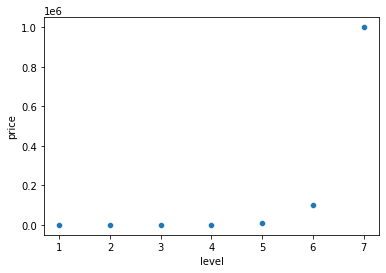

In [163]:
# 산점도 그려보기
sns.scatterplot(x = price_df['level'], y = price_df['price'])

<AxesSubplot:xlabel='level', ylabel='price'>

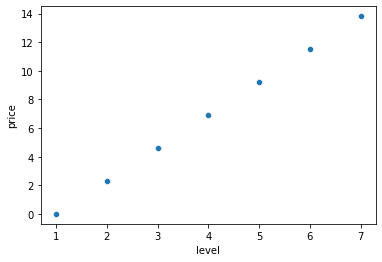

In [164]:
# 마지막 값의 스케일이 너무 커서 눈에 잘 안들어오니까 log 씌워주기
sns.scatterplot(x = price_df['level'], y = np.log(price_df['price']))

In [165]:
# 로그를 다시 원래 값으로 되돌리고 싶을 때 : np.exp()
# 테스트값 먼저 출력해보고 그 결과를 np.exp에 넣어보기
np.log(55)

4.007333185232471

In [166]:
# 위에서 나온 결과를 np.exp()에 넣어보면 다시 원래값(55)의 근사치로 돌아간 것을 알 수 있음
np.exp(4.007333185232471)

55.000000000000014



# 원핫인코딩(One hot encoding)!!!!!!!!!!!!!!!


In [167]:
# 대부분의 머신러닝 알고리즘은 숫자가 아니면 데이터를 잘 받아들이지 않음
# 머신러닝 모델링 목적이라면 문자형 데이터를 어떤식으로든 숫자로 바꿔주는게 좋음
# 머신러닝에 사용하지 않고 그냥 분석용 데이터면 상관없지만, 머신러닝 알고리즘에 쓰려면 카테고리컬 데이터도 숫자로 바꿔주는게 좋음

① Log Transformation : 데이터의 변환을 위해 로그 함수를 적용하는 과정. 데이터의 스케일을 조정하거나 정규성을 높이는 데 사용됩니다.
② get_dummies : 주어진 범주형 열의 각 고유 범주를 대표하는 새로운 이진(0 또는 1) 열을 생성합니다.

아래 링크를 통해 로그의 개념과 지수와 로그의 관계에 대해 다시 한번 살펴봅시다.
① 로그란? [출처 : Khan Academy]
② 지수와 로그의 관계 [출처 : Khan Academy]

In [168]:
# 판다스에서 원핫인코딩 불러오기 (원하는 데이터&컬럼)
pd.get_dummies(salary_df, columns = ['Gender'])

#결과 보면 두번째 컬럼이었던 gender가 없어지고 맨뒤에 male/female이 생김

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI,Gender_Female,Gender_Male
0,32.0,1,Software Engineer,5.0,90000,UK,White,0,132.00,0,1
1,28.0,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48,1,0
2,45.0,3,Manager,15.0,150000,Canada,White,1,158.70,0,1
3,36.0,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48,1,0
4,52.0,2,Director,20.0,200000,USA,Asian,0,307.48,0,1
...,...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00,1,0
6680,32.0,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30,0,1
6681,30.0,1,Financial Manager,4.0,55000,China,Chinese,0,100.00,1,0
6682,46.0,2,Marketing Manager,14.0,140000,China,Korean,0,100.00,0,1


In [169]:
# 굳이 gender_male, female 두개 다 있을 필요 없으므로 하나 삭제
pd.get_dummies(salary_df, columns = ['Gender'], drop_first = True)

,Age,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI,Gender_Male
0,32.0,1,Software Engineer,5.0,90000,UK,White,0,132.00,1
1,28.0,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48,0
2,45.0,3,Manager,15.0,150000,Canada,White,1,158.70,1
3,36.0,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48,0
4,52.0,2,Director,20.0,200000,USA,Asian,0,307.48,1
...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00,0
6680,32.0,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30,1
6681,30.0,1,Financial Manager,4.0,55000,China,Chinese,0,100.00,0
6682,46.0,2,Marketing Manager,14.0,140000,China,Korean,0,100.00,1


In [170]:
# 결과값이 출력될때 화면에 보이는 테이블의 컬럼 개수를 내 마음대로 바꿀 수 있음
# 모든 컬럼을 다 확인할 필요 있을때 셋옵션 변경해주면 됨

pd.set_option('display.max_columns', 50)
# = 컬럼을 50개까지는 그냥 다 보여줘라

#참고로 컬럼 개수가 너무 많으면 모델링에 별로 좋지 않음. 고유값 줄이는 방법 찾는게 좋음.

In [171]:
pd.get_dummies(salary_df, columns = ['Gender', 'Country', 'Race'], drop_first = True)

,Age,Education Level,Job Title,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White
0,32.0,1,Software Engineer,5.0,90000,0,132.00,1,0,0,1,0,0,0,0,0,0,0,0,0,1
1,28.0,2,Data Analyst,3.0,65000,0,307.48,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,45.0,3,Manager,15.0,150000,1,158.70,1,1,0,0,0,0,0,0,0,0,0,0,0,1
3,36.0,1,Sales Associate,7.0,60000,0,307.48,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,52.0,2,Director,20.0,200000,0,307.48,1,0,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6679,49.0,3,Director of Marketing,20.0,200000,0,132.00,0,0,0,1,0,0,0,0,0,0,0,1,0,0
6680,32.0,0,Sales Associate,3.0,50000,0,135.30,1,0,0,0,0,0,1,0,0,0,0,0,0,0
6681,30.0,1,Financial Manager,4.0,55000,0,100.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0
6682,46.0,2,Marketing Manager,14.0,140000,0,100.00,1,0,1,0,0,0,0,0,0,0,1,0,0,0


In [172]:
# 카테고리에서 고유값 어떤 것들이 있는지 확인
salary_df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [173]:
# 그 고유값 몇개인지 확인
salary_df['Gender'].nunique()

2

In [174]:
# 각 컬럼별로 고유값 개수 한번에 확인
salary_df[['Gender', 'Country', 'Race', 'Job Title']].nunique()

Gender         2
Country        5
Race          10
Job Title    129
dtype: int64

In [175]:
# job title 더 상세하게 살펴보기
salary_df['Job Title'].value_counts()

Software Engineer                 808
Data Scientist                    515
Data Analyst                      389
Software Engineer Manager         374
Product Manager                   323
                                 ... 
Director of Sales                   1
UX Researcher                       1
Director of Product Management      1
Consultant                          1
Human Resources Director            1
Name: Job Title, Length: 129, dtype: int64

In [176]:
# 하단에 1개씩 나오는 값들이 좀 거슬리니까 tail로 좀 더 뜯어보기
salary_df['Job Title'].value_counts().tail(20)

Principal Scientist               1
Supply Chain Manager              1
Customer Success Rep              1
Technical Writer                  1
Developer                         1
CEO                               1
Chief Data Officer                1
Digital Content Producer          1
Customer Success Manager          1
Software Project Manager          1
Supply Chain Analyst              1
Office Manager                    1
Principal Engineer                1
Sales Operations Manager          1
Web Designer                      1
Director of Sales                 1
UX Researcher                     1
Director of Product Management    1
Consultant                        1
Human Resources Director          1
Name: Job Title, dtype: int64

In [177]:
# 위처럼 케이스가 1개씩만 나오는 값들은 머신러닝에 딱히 도움이 안되므로
# 드랍하거나, 다른 값으로 바꿔주는게 좋음
# 더 확실히 확인하기 위해 잡타이틀의 세부값 전체 출력해보기

In [178]:
salary_df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Manager', 'Sales Associate',
       'Director', 'Marketing Analyst', 'Product Manager',
       'Sales Manager', 'Marketing Coordinator', 'Scientist',
       'Software Developer', 'HR Manager', 'Financial Analyst',
       'Project Manager', 'Customer Service Rep', 'Operations Manager',
       'Marketing Manager', 'Engineer', 'Data Entry Clerk',
       'Sales Director', 'Business Analyst', 'VP of Operations',
       'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Developer',
       'Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
       'Director of Marketing', 'Help Des

In [179]:
# 이름이 중구난방인 것을 보아하니 옵션 중에 선택한게 아니라 그냥 사람들이 자기 마음대로 아무거나 쓴 것 같음
# 이름을 조금 더 간소화 시키면 케이스를 줄일 수 있을 것 같음
# replace로 수기 변환 혹은 엑셀로 csv 파일 만들어서 교체해도 됨
# 이 수업에서는 시간 단축을 위하여 job.csv로 이미 만들어둠

pd.read_csv('/aiffel/data/job.csv')

,Job Title,Jobs
0,Software Engineer,Software
1,Data Analyst,Data Analyst
2,Manager,Manager
3,Sales Associate,Sales
4,Director,Director
...,...,...
123,Juniour HR Coordinator,HR
124,Digital Marketing Specialist,Marketing
125,Receptionist,Receptionist
126,Social Media Man,Social Media


In [180]:
# 불러온 데이터를 job이라는 이름으로 저장
job = pd.read_csv('/aiffel/data/job.csv')

In [181]:
# 두 테이블 합치기
salary_df.merge(job, on = 'Job Title', how = 'left')

# 잘 합쳐져있는지 확인 (시니어 데이터가 제대로 수집되지 않은 것 같은데 여기서는 그냥 넘어가겠음)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior,CPI,Jobs
0,32.0,Male,1,Software Engineer,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,Data Analyst,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,Manager,15.0,150000,Canada,White,1,158.70,Manager
3,36.0,Female,1,Sales Associate,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,Director,20.0,200000,USA,Asian,0,307.48,Director
...,...,...,...,...,...,...,...,...,...,...,...
6669,49.0,Female,3,Director of Marketing,20.0,200000,UK,Mixed,0,132.00,Marketing
6670,32.0,Male,0,Sales Associate,3.0,50000,Australia,Australian,0,135.30,Sales
6671,30.0,Female,1,Financial Manager,4.0,55000,China,Chinese,0,100.00,Financial
6672,46.0,Male,2,Marketing Manager,14.0,140000,China,Korean,0,100.00,Marketing


In [182]:
# 잘 합쳐졌으면 salary_df에 덮어씌우기
salary_df = salary_df.merge(job, on = 'Job Title', how = 'left')

In [183]:
# 잘 합쳐졌으니 기존 job title은 필요없으니 없애기 (우측 Jobs 잘 나오는지 미리보기)
salary_df.drop('Job Title', axis = 1)

,Age,Gender,Education Level,Years of Experience,Salary,Country,Race,Senior,CPI,Jobs
0,32.0,Male,1,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,15.0,150000,Canada,White,1,158.70,Manager
3,36.0,Female,1,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,20.0,200000,USA,Asian,0,307.48,Director
...,...,...,...,...,...,...,...,...,...,...
6669,49.0,Female,3,20.0,200000,UK,Mixed,0,132.00,Marketing
6670,32.0,Male,0,3.0,50000,Australia,Australian,0,135.30,Sales
6671,30.0,Female,1,4.0,55000,China,Chinese,0,100.00,Financial
6672,46.0,Male,2,14.0,140000,China,Korean,0,100.00,Marketing


In [184]:
# 제대로 반영되었다면 salary_df에 데이터 덮어씌우기(inplace)
salary_df.drop('Job Title', axis = 1, inplace = True)

In [185]:
# 잘 반영되었는지 최종 확인
salary_df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Country,Race,Senior,CPI,Jobs
0,32.0,Male,1,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,15.0,150000,Canada,White,1,158.70,Manager
3,36.0,Female,1,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,20.0,200000,USA,Asian,0,307.48,Director


In [186]:
# jobs에 몇개의 고유값이 있는지 확인(nunique 사용)
salary_df['Jobs'].nunique()

60

In [187]:
# 각 jobs 항목별로 각각 몇개의 데이터가 있는지 추가 확인(value_counts)
salary_df['Jobs'].value_counts()

Software                        2156
Marketing                        999
Data Scientist                   572
Sales                            453
HR                               420
Data Analyst                     389
Product Manager                  325
Project Engineer                 316
Financial                        200
Research                         195
Operations                       147
Web Developer                    129
Product Designer                  80
Receptionist                      57
Project Manager                   36
Business Analyst                  23
Graphic Designer                  23
Social Media                      18
Customer Service                  11
Business Development               7
UX                                 6
Accountant                         6
Business Development Manager       5
Account                            5
Delivery Driver                    5
Project Coordinator                4
Scientist                          4
R

In [188]:
# 여전히 10건 이하인 job들이 많음, 데이터의 개수가 너무 적으면 데이터가 유의미할 확률이 낮으므로 그냥 others로 합쳐버리는 것도 방법임

# 여기서는 일단 그냥 넘어가겠음. salary_df보면서 원핫인코딩 해보겠음
salary_df.head()

,Age,Gender,Education Level,Years of Experience,Salary,Country,Race,Senior,CPI,Jobs
0,32.0,Male,1,5.0,90000,UK,White,0,132.00,Software
1,28.0,Female,2,3.0,65000,USA,Hispanic,0,307.48,Data Analyst
2,45.0,Male,3,15.0,150000,Canada,White,1,158.70,Manager
3,36.0,Female,1,7.0,60000,USA,Hispanic,0,307.48,Sales
4,52.0,Male,2,20.0,200000,USA,Asian,0,307.48,Director


In [189]:
pd.get_dummies(salary_df, columns = ['Gender', 'Country', 'Race', 'Jobs'], drop_first = True)

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,32.0,1,5.0,90000,0,132.00,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,28.0,2,3.0,65000,0,307.48,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45.0,3,15.0,150000,1,158.70,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,36.0,1,7.0,60000,0,307.48,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,52.0,2,20.0,200000,0,307.48,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,49.0,3,20.0,200000,0,132.00,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6670,32.0,0,3.0,50000,0,135.30,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6671,30.0,1,4.0,55000,0,100.00,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6672,46.0,2,14.0,140000,0,100.00,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [190]:
# 데이터 확인 후 salary_df 데이터 덮어씌우기
salary_df = pd.get_dummies(salary_df, columns = ['Gender', 'Country', 'Race', 'Jobs'], drop_first = True)

# 스케일링(Scaling)!!!!!!!!!!!!!!!!!!!!!!

- 데이터 단위의 크기(범위)
- 연차(년)과 연봉(원)에서 각각의 1이 나타내는 숫자의 크기 차이가 큼(1년과 1원의 차이가 컴퓨터에게는 제대로 인식되지 않음. 연차의 1년는 엄청난 차이지만, 연봉의 1원 차이는 딱히 의미 없지)
- 그래서 두 데이터를 일정한 기준으로 유사한 크기로 만들어주는 것이 스케일링

- 대표적인 스케일링 기법
1. standard_scaling: 평균 0, 분산 1인 형태로 데이터를 재배열 (데이터-평균/표준편차)
2. robust_scaling: 스탠다드랑 비슷하지만 아웃라이어 영향 덜받음(계산에 평균, 표준편차가 아니라 사분위값, 중앙값을 사용)
3. min_max_scaling: 최대값이 1, 최소값이 0인 형태로 재배열

- 스케일링 언제 사용함??
: 각 변수의 크기(scale)이 중요하게 작용할 때(ex. KNN, K-Means -데이터간 거리 기반 분석하는 알고리즘 사용시)

In [192]:
# Age컬럼을 스탠다스 스케일링 해보기
# 우선 평균과 표준편차 구하기
salary_df['Age'].mean()

33.61282589151933

In [193]:
salary_df['Age'].std()

7.594369005848066

In [194]:
# 스탠다드 스케일링 적용 : (age - 평균)/표준편차
(salary_df['Age'] - salary_df['Age'].mean())/salary_df['Age'].std()

0      -0.212371
1      -0.739077
2       1.499423
3       0.314335
4       2.421159
          ...   
6669    2.026129
6670   -0.212371
6671   -0.475724
6672    1.631100
6673   -1.002430
Name: Age, Length: 6674, dtype: float64

In [195]:
# 로버스트 스케일링
# 먼저 q1~3 구하기 (quantile)
salary_df['Age'].quantile(0.25)

28.0

In [196]:
salary_df['Age'].quantile(0.5)

32.0

In [197]:
salary_df['Age'].quantile(0.75)

38.0

In [198]:
# 로버스트 스케일링 계산: (Age - q2) / (q3-q1)
(salary_df['Age'] - salary_df['Age'].quantile(0.5))/(salary_df['Age'].quantile(0.75)-salary_df['Age'].quantile(0.25))

0       0.0
1      -0.4
2       1.3
3       0.4
4       2.0
       ... 
6669    1.7
6670    0.0
6671   -0.2
6672    1.4
6673   -0.6
Name: Age, Length: 6674, dtype: float64

In [199]:
# min_max 구하기
salary_df['Age'].min()

21.0

In [200]:
salary_df['Age'].max()

62.0

In [202]:
# (Age - min) / (max - min)
(salary_df['Age'] - salary_df['Age'].min()) / (salary_df['Age'].max() - salary_df['Age'].min())

0       0.268293
1       0.170732
2       0.585366
3       0.365854
4       0.756098
          ...   
6669    0.682927
6670    0.268293
6671    0.219512
6672    0.609756
6673    0.121951
Name: Age, Length: 6674, dtype: float64

In [203]:
# 위와 같이 하나씩 직접 계산할 수도 있지만, 파이썬에는 이 모든걸 자동으로 계산해주는 기능이 있음
# 사이키런 라이브러리 불러오기
# 그냥 sklearn 다 불러와도 되지만, 그러면 너무 방대한 양이 불러와서 메모리에 지장이 생길 수 있으니, preprocessing으로 제한해서 필요한 것만 가져오기
# import 뒤에 쉼표로 여러가지를 한번에 불러올 수 있음

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [204]:
# 라이브러리 불러온 다음에는 이후 사용하기 편리하게 고유한 이름 지정
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

In [205]:
# 잘 입력 되었는지 확인
ss

StandardScaler()

In [206]:
# 학습 시키기(평균, 표준편차 학습)
ss.fit(salary_df)

StandardScaler()

In [207]:
# 학습 기반 연산
ss.transform(salary_df)

array([[-0.2123872 , -0.70663318, -0.51025684, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [-0.7391327 ,  0.42922179, -0.84197037, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [ 1.49953568,  1.56507675,  1.14831086, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       ...,
       [-0.47575995, -0.70663318, -0.6761136 , ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [ 1.63122206,  0.42922179,  0.98245409, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [-1.00250545, -1.84248814, -1.17368391, ..., -0.029997  ,
        -0.01224164, -0.14039125]])

In [208]:
# 결과가 numpy array 형태로 나와서 한눈에 보기 어려우므로 데이터프레임으로 바꿔주기
pd.DataFrame(ss.transform(salary_df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
0,-0.212387,-0.706633,-0.510257,-0.478921,-0.408641,-0.480155,0.905822,-0.496767,-0.500281,2.004506,-0.504725,-0.560853,-0.269528,-0.264051,-0.265993,-0.225150,-0.271124,-0.229524,-0.229162,1.555332,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,1.447601,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
1,-0.739133,0.429222,-0.841970,-0.952268,-0.408641,1.915926,-1.103970,-0.496767,-0.500281,-0.498876,1.981278,-0.560853,-0.269528,-0.264051,-0.265993,4.441476,-0.271124,-0.229524,-0.229162,-0.642950,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
2,1.499536,1.565077,1.148311,0.657112,2.447137,-0.115582,0.905822,2.013016,-0.500281,-0.498876,-0.504725,-0.560853,-0.269528,-0.264051,-0.265993,-0.225150,-0.271124,-0.229524,-0.229162,1.555332,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
3,0.314358,-0.706633,-0.178543,-1.046938,-0.408641,1.915926,-1.103970,-0.496767,-0.500281,-0.498876,1.981278,-0.560853,-0.269528,-0.264051,-0.265993,4.441476,-0.271124,-0.229524,-0.229162,-0.642950,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,3.705792,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
4,2.421340,0.429222,1.977595,1.603806,-0.408641,1.915926,0.905822,-0.496767,-0.500281,-0.498876,1.981278,1.782999,-0.269528,-0.264051,-0.265993,-0.225150,-0.271124,-0.229524,-0.229162,-0.642950,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,2.026281,1.565077,1.977595,1.603806,-0.408641,-0.480155,-1.103970,-0.496767,-0.500281,2.004506,-0.504725,-0.560853,-0.269528,-0.264051,-0.265993,-0.225150,-0.271124,4.356838,-0.229162,-0.642950,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
6670,-0.212387,-1.842488,-0.841970,-1.236277,-0.408641,-0.435096,0.905822,-0.496767,-0.500281,-0.498876,-0.504725,-0.560853,3.710187,-0.264051,-0.265993,-0.225150,-0.271124,-0.229524,-0.229162,-0.642950,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,3.705792,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
6671,-0.475760,-0.706633,-0.676114,-1.141607,-0.408641,-0.917097,-1.103970,-0.496767,1.998877,-0.498876,-0.504725,-0.560853,-0.269528,-0.264051,

In [209]:
# 아래에 컬럼 이름 쉽게 추가하기 위해 전체 컬럼명 불러오기
salary_df.columns

Index(['Age', 'Education Level', 'Years of Experience', 'Salary', 'Senior',
       'CPI', 'Gender_Male', 'Country_Canada', 'Country_China', 'Country_UK',
       'Country_USA', 'Race_Asian', 'Race_Australian', 'Race_Black',
       'Race_Chinese', 'Race_Hispanic', 'Race_Korean', 'Race_Mixed',
       'Race_Welsh', 'Race_White', 'Jobs_Accountant', 'Jobs_Administrative',
       'Jobs_Advertising Coordinator', 'Jobs_Business Analyst',
       'Jobs_Business Development', 'Jobs_Business Development ',
       'Jobs_Business Development Manager', 'Jobs_CEO', 'Jobs_CTO',
       'Jobs_Consultant', 'Jobs_Copywriter', 'Jobs_Creative Director',
       'Jobs_Customer Service', 'Jobs_Customer Success', 'Jobs_Data Analyst',
       'Jobs_Data Engineer', 'Jobs_Data Entry Clerk', 'Jobs_Data Scientist',
       'Jobs_Delivery Driver', 'Jobs_Designer',
       'Jobs_Digital Content Producer', 'Jobs_Director', 'Jobs_Engineer',
       'Jobs_Engineering', 'Jobs_Event Coordinator', 'Jobs_Financial',
       'Jobs_G

In [210]:
# 보기 좋게 컬럼 이름도 넣어주기
# 위에 출력된 컬럼을 다 복사해서 넣어도 되고, 그냥 저 수식을 넣어도 됨 (수식이 더 깔끔하니까 수식으로 넣겠음)
pd.DataFrame(ss.transform(salary_df), columns = salary_df.columns)

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,-0.212387,-0.706633,-0.510257,-0.478921,-0.408641,-0.480155,0.905822,-0.496767,-0.500281,2.004506,-0.504725,-0.560853,-0.269528,-0.264051,-0.265993,-0.225150,-0.271124,-0.229524,-0.229162,1.555332,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,1.447601,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
1,-0.739133,0.429222,-0.841970,-0.952268,-0.408641,1.915926,-1.103970,-0.496767,-0.500281,-0.498876,1.981278,-0.560853,-0.269528,-0.264051,-0.265993,4.441476,-0.271124,-0.229524,-0.229162,-0.642950,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
2,1.499536,1.565077,1.148311,0.657112,2.447137,-0.115582,0.905822,2.013016,-0.500281,-0.498876,-0.504725,-0.560853,-0.269528,-0.264051,-0.265993,-0.225150,-0.271124,-0.229524,-0.229162,1.555332,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
3,0.314358,-0.706633,-0.178543,-1.046938,-0.408641,1.915926,-1.103970,-0.496767,-0.500281,-0.498876,1.981278,-0.560853,-0.269528,-0.264051,-0.265993,4.441476,-0.271124,-0.229524,-0.229162,-0.642950,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,3.705792,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
4,2.421340,0.429222,1.977595,1.603806,-0.408641,1.915926,0.905822,-0.496767,-0.500281,-0.498876,1.981278,1.782999,-0.269528,-0.264051,-0.265993,-0.225150,-0.271124,-0.229524,-0.229162,-0.642950,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,2.026281,1.565077,1.977595,1.603806,-0.408641,-0.480155,-1.103970,-0.496767,-0.500281,2.004506,-0.504725,-0.560853,-0.269528,-0.264051,-0.265993,-0.225150,-0.271124,4.356838,-0.229162,-0.642950,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314

In [211]:
# 데이터가 잘 나왔는지 확인 후 ss_df라는 이름으로 저장
ss_df = pd.DataFrame(ss.transform(salary_df), columns = salary_df.columns)

# 여기서 스케일링을 다양하게 해볼 예정이라 일부러 이름을 salary_df가 아닌 ss_df로 다르게 저장

In [212]:
# 위와 동일한 방식으로 로버스트 스케일링도 해보기

rs.fit(salary_df)

RobustScaler()

In [213]:
rs.transform(salary_df)

array([[ 0.        ,  0.        , -0.22222222, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4       ,  1.        , -0.44444444, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.3       ,  2.        ,  0.88888889, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.2       ,  0.        , -0.33333333, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.4       ,  1.        ,  0.77777778, ...,  0.        ,
         0.        ,  0.        ],
       [-0.6       , -1.        , -0.66666667, ...,  0.        ,
         0.        ,  0.        ]])

In [214]:
pd.DataFrame(rs.transform(salary_df), columns = salary_df.columns)

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,0.0,0.0,-0.222222,-0.277778,0.0,-0.123596,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.4,1.0,-0.444444,-0.555556,0.0,6.448689,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.3,2.0,0.888889,0.388889,1.0,0.876404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,0.0,0.000000,-0.611111,0.0,6.448689,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.444444,0.944444,0.0,6.448689,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,1.7,2.0,1.444444,0.944444,0.0,-0.123596,-1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6670,0.0,-1.0,-0.444444,-0.722222,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6671,-0.2,0.0,-0.333333,-0.666667,0.0,-1.322097,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6672,1.4,1.0,0.777778,0.277778,0.0,-1.322097,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [215]:
rs_df = pd.DataFrame(rs.transform(salary_df), columns = salary_df.columns)

In [216]:
# minmax도 구해보기
mm.fit(salary_df)

MinMaxScaler()

In [217]:
pd.DataFrame(mm.transform(salary_df), columns = salary_df.columns)

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,0.268293,0.333333,0.147059,0.359103,0.0,0.154232,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.170732,0.666667,0.088235,0.258963,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.585366,1.000000,0.441176,0.599439,1.0,0.282919,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.365854,0.333333,0.205882,0.238935,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.756098,0.666667,0.588235,0.799720,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,0.682927,1.000000,0.588235,0.799720,0.0,0.154232,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6670,0.268293,0.000000,0.088235,0.198878,0.0,0.170137,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6671,0.219512,0.333333,0.117647,0.218906,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6672,0.609756,0.666667,0.411765,0.559383,0.0,0.000000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
mm_df = pd.DataFrame(mm.transform(salary_df), columns = salary_df.columns)

In [219]:
# head로 각각의 스케일링 결과 확인
ss_df.head()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,-0.212387,-0.706633,-0.510257,-0.478921,-0.408641,-0.480155,0.905822,-0.496767,-0.500281,2.004506,-0.504725,-0.560853,-0.269528,-0.264051,-0.265993,-0.225150,-0.271124,-0.229524,-0.229162,1.555332,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,1.447601,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
1,-0.739133,0.429222,-0.841970,-0.952268,-0.408641,1.915926,-1.103970,-0.496767,-0.500281,-0.498876,1.981278,-0.560853,-0.269528,-0.264051,-0.265993,4.441476,-0.271124,-0.229524,-0.229162,-0.642950,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
2,1.499536,1.565077,1.148311,0.657112,2.447137,-0.115582,0.905822,2.013016,-0.500281,-0.498876,-0.504725,-0.560853,-0.269528,-0.264051,-0.265993,-0.225150,-0.271124,-0.229524,-0.229162,1.555332,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
3,0.314358,-0.706633,-0.178543,-1.046938,-0.408641,1.915926,-1.103970,-0.496767,-0.500281,-0.498876,1.981278,-0.560853,-0.269528,-0.264051,-0.265993,4.441476,-0.271124,-0.229524,-0.229162,-0.642950,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,3.705792,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391
4,2.421340,0.429222,1.977595,1.603806,-0.408641,1.915926,0.905822,-0.496767,-0.500281,-0.498876,1.981278,1.782999,-0.269528,-0.264051,-0.265993,-0.225150,-0.271124,-0.229524,-0.229162,-0.642950,-0.029997,-0.017314,-0.012242,-0.058806,-0.012242,...,-0.012242,-0.012242,-0.150073,-0.012242,-0.110146,-0.22625,-0.024489,-0.222938,-0.073643,-0.012242,-0.092813,-0.024489,-0.173486,-0.269848,-0.024489,-0.052003,-0.690798,-0.012242,-0.012242,-0.021206,-0.012242,-0.017314,-0.029997,-0.012242,-0.140391


In [220]:
# 로버스트 스케일링
rs_df.head()

# 결과를 보면, 원핫인코딩한 컬럼들의 결과가 스탠다드랑 좀 다른 것을 알 수 있음. (0과1)

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,0.0,0.0,-0.222222,-0.277778,0.0,-0.123596,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.4,1.0,-0.444444,-0.555556,0.0,6.448689,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.3,2.0,0.888889,0.388889,1.0,0.876404,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.4,0.0,0.000000,-0.611111,0.0,6.448689,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,1.0,1.444444,0.944444,0.0,6.448689,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
# minmax
mm_df.head()

# 결과에 음수가 없이 0~1 사이의 값들로 채워진 것을 알 수 있음(원핫인코딩쪽이 기존 salary_df랑 똑같음)

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,0.268293,0.333333,0.147059,0.359103,0.0,0.154232,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.170732,0.666667,0.088235,0.258963,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.585366,1.000000,0.441176,0.599439,1.0,0.282919,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.365854,0.333333,0.205882,0.238935,0.0,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.756098,0.666667,0.588235,0.799720,0.0,1.000000,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
salary_df.head()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
0,32.0,1,5.0,90000,0,132.00,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,28.0,2,3.0,65000,0,307.48,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,45.0,3,15.0,150000,1,158.70,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,36.0,1,7.0,60000,0,307.48,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,52.0,2,20.0,200000,0,307.48,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [224]:
# 통계적 특성 확인(describe)
ss_df.describe()

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
count,6.674000e+03,6.674000e+03,6674.000000,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,...,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6674.000000,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03,6.674000e+03
mean,3.406858e-17,1.277572e-16,0.000000,1.022057e-16,1.022057e-16,-2.571113e-16,-1.192400e-16,-7.186340e-17,-3.619786e-17,-6.427782e-17,-2.235750e-17,-4.152108e-17,3.460090e-17,3.832715e-17,-6.387858e-18,4.870742e-17,5.323215e-18,-3.327009e-17,3.193929e-17,4.471501e-17,-4.258572e-18,2.129286e-18,-1.064643e-18,-2.981000e-17,-1.064643e-18,...,-2.129286e-18,-2.129286e-18,-2.555143e-17,-1.064643e-18,-3.406858e-17,2.555143e-17,-8.517144e-18,6.813715e-17,3.406858e-17,-1.064643e-18,-1.703429e-17,-1.064643e-17,0.000000,3.406858e-17,-1.064643e-17,3.406858e-17,-3.406858e-17,-2.129286e-18,-1.064643e-18,4.258572e-18,-2.129286e-18,-2.129286e-18,-4.258572e-18,-2.129286e-18,-4.258572e-17
std,1.000075e+00,1.000075e+00,1.000075,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,...,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00,1.000075e+00
min,-1.660937e+00,-1.842488e+00,-1.339541,-2.176344e+00,-4.086407e-01,-9.170975e-01,-1.103970e+00,-4.967671e-01,-5.002809e-01,-4.988760e-01,-5.047248e-01,-5.608528e-01,-2.695282e-01,-2.640506e-01,-2.659933e-01,-2.251504e-01,-2.711238e-01,-2.295243e-01,-2.291623e-01,-6.429496e-01,-2.999700e-02,-1.731358e-02,-1.224164e-02,-5.880584e-02,-1.224164e-02,...,-1.224164e-02,-1.224164e-02,-1.500728e-01,-1.224164e-02,-1.101465e-01,-2.262502e-01,-2.448878e-02,-2.229376e-01,-7.364320e-02,-1.224164e-02,-9.281258e-02,-2.448878e-02,-0.173486,-2.698479e-01,-2.448878e-02,-5.200314e-02,-6.907983e-01,-1.224164e-02,-1.224164e-02,-2.120631e-02,-1.224164e-02,-1.731358e-02,-2.999700e-02,-1.224164e-02,-1.403912e-01
25%,-7.391327e-01,-7.066332e-01,-0.841970,-8.575989e-01,-4.086407e-01,-4.801554e-01,-1.103970e+00,-4.967671e-01,-5.002809e-01,-4.988760e-01,-5.047248e-01,-5.608528e-01,-2.695282e-01,-2.640506e-01,-2.659933e-01,-2.251504e-01,-2.711238e-01,-2.295243e-01,-2.291623e-01,-6.429496e-01,-2.999700e-02,-1.731358e-02,-1.224164e-02,-5.880584e-02,-1.224164e-02,...,-1.224164e-02,-1.224164e-02,-1.500728e-01,-1.224164e-02,-1.101465e-01,-2.262502e-01,-2.448878e-02,-2.229376e-01,-7.364320e-02,-1.22

In [225]:
# 위 값들이 뭔지 모르겠으면 round함수로 확인 가능
round(6.674000e+03)

6674

In [227]:
# 소수점을 더 보고싶다면 콤마+자리수 추가
round(6.674000e+03, 10)

6674.0

In [228]:
# 로버스트스케일링의 세부 데이터 확인
rs_df.describe()

# 스탠다드와 비슷하지만 평균이 완전 0이 되지는 않음

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.00000,6674.000000,6674.000000,6674.000000,...,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.00000,6674.000000,6674.000000,6674.000000
mean,0.161283,0.622116,0.119610,0.003271,0.143093,1.193437,-0.450704,0.197932,0.200180,0.199281,0.203027,0.239287,0.067726,0.065178,0.066077,0.048247,0.068475,0.050045,0.049895,0.292478,0.000899,0.00030,0.000150,0.003446,0.000150,...,0.000150,0.000150,0.022026,0.000150,0.011987,0.048696,0.000599,0.047348,0.005394,0.000150,0.008541,0.000599,0.029218,0.067875,0.000599,0.002697,0.323045,0.000150,0.000150,0.000450,0.000150,0.00030,0.000899,0.000150,0.019329
std,0.759437,0.880460,0.669972,0.586881,0.350193,2.743136,0.497601,0.398471,0.400165,0.399490,0.402282,0.426680,0.251293,0.246859,0.248436,0.214304,0.252578,0.218054,0.217745,0.454935,0.029972,0.01731,0.012241,0.058608,0.012241,...,0.012241,0.012241,0.146778,0.012241,0.108834,0.215249,0.024476,0.212398,0.073251,0.012241,0.092027,0.024476,0.168429,0.251551,0.024476,0.051867,0.467675,0.012241,0.012241,0.021198,0.012241,0.01731,0.029972,0.012241,0.137688
min,-1.100000,-1.000000,-0.777778,-1.273889,0.000000,-1.322097,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,-0.400000,0.000000,-0.444444,-0.500000,0.000000,-0.123596,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.600000,1.000000,0.555556,0.500000,0.000000,0.876404,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0000

In [229]:
# minmax도 출력해보기

mm_df.describe()

# 평균값, 미니멈과 맥시멈이 0과 1사이라는 것을 알 수 있음

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
count,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.00000,6674.000000,6674.000000,6674.000000,...,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.000000,6674.00000,6674.000000,6674.000000,6674.000000
mean,0.307630,0.540705,0.237544,0.460422,0.143093,0.323717,0.549296,0.197932,0.200180,0.199281,0.203027,0.239287,0.067726,0.065178,0.066077,0.048247,0.068475,0.050045,0.049895,0.292478,0.000899,0.00030,0.000150,0.003446,0.000150,...,0.000150,0.000150,0.022026,0.000150,0.011987,0.048696,0.000599,0.047348,0.005394,0.000150,0.008541,0.000599,0.029218,0.067875,0.000599,0.002697,0.323045,0.000150,0.000150,0.000450,0.000150,0.00030,0.000899,0.000150,0.019329
std,0.185229,0.293487,0.177346,0.211574,0.350193,0.353006,0.497601,0.398471,0.400165,0.399490,0.402282,0.426680,0.251293,0.246859,0.248436,0.214304,0.252578,0.218054,0.217745,0.454935,0.029972,0.01731,0.012241,0.058608,0.012241,...,0.012241,0.012241,0.146778,0.012241,0.108834,0.215249,0.024476,0.212398,0.073251,0.012241,0.092027,0.024476,0.168429,0.251551,0.024476,0.051867,0.467675,0.012241,0.012241,0.021198,0.012241,0.01731,0.029972,0.012241,0.137688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.170732,0.333333,0.088235,0.278991,0.000000,0.154232,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.268293,0.333333,0.205882,0.459243,0.000000,0.170137,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.414634,0.666667,0.352941,0.639495,0.000000,0.282919,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

# 각 스케일링들을 언제 어떻게 선택해야함?
- 스탠다드: 아웃라이어가 없는 데이터, 변수 분포가 정규분포에 가까울때
    - 리니어 리그레이션(연속적인 값 예측), 로지스틱 회귀(분류 문제에 적합한 확률 결과 제공), 서포트 벡터 머신(이진 또는 다중 클래스 분류, 회귀)에 사용됩니다.


- 로버스트: 아웃라이어 많을때, 정규분포 따르지 않는 데이터

- 민맥스: 스케일링한 결과값의 범위를 제한하고 싶을 때 (딥러닝)

* 근데 보통 실무에서는 뭘 써야할지 쉽게 결정되지 않기 때문에, 모든 스케일링을 다 구해보고 모델링 결과가 가장 좋은 기법을 선택하기도 함.

* 조심해야할 부분!
- 원핫인코딩으로 구한 데이터들은 0~1로 다른 컬럼들에 비해 차이 간격이 크게 느껴질 수 있으므로, 거리 기반 알고리즘을 사용할 때에는 이 부분을 잘 고려해야함 (결과물이 너무 원핫인코딩에 의해 영향을 많이 받았다 싶으면 과감하게 해당 컬럼을 제외하는 것도 방법임)

In [230]:
# 추가 팁: 아까 앞부분에 fit과 transform을 각각 처리했는데, 이걸 한번에 처리할 수 있는 함수도 있음
ss.fit_transform(salary_df)

array([[-0.2123872 , -0.70663318, -0.51025684, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [-0.7391327 ,  0.42922179, -0.84197037, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [ 1.49953568,  1.56507675,  1.14831086, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       ...,
       [-0.47575995, -0.70663318, -0.6761136 , ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [ 1.63122206,  0.42922179,  0.98245409, ..., -0.029997  ,
        -0.01224164, -0.14039125],
       [-1.00250545, -1.84248814, -1.17368391, ..., -0.029997  ,
        -0.01224164, -0.14039125]])

# 주성분 분석(PCA)!!!!!!!!!!!!!!!!

- PCA: Principal Component Analysis, 데이터의 차원(변수의 수)을 축소하는 기법


In [231]:
# PCA 라이브러리 불러오기
from sklearn.decomposition import PCA

In [232]:
# PCA에 이름 정해서 OBJECT로 만들어주기
pca = PCA()

In [233]:
# 사용방법1. Fit으로 학습 -> transform
pca.fit(salary_df)

PCA()

In [234]:
pca.transform(salary_df)

array([[-2.52944014e+04, -3.59275148e+01,  4.21191992e-01, ...,
         2.12267080e-03, -1.75193161e-04,  7.72588945e-14],
       [-5.02944071e+04,  1.38806380e+02, -3.33186512e-01, ...,
         1.01275316e-03,  1.23495617e-03,  1.50095655e-13],
       [ 3.47055994e+04, -7.43207716e+00,  8.55241614e+00, ...,
         8.92432204e-04, -2.76028100e-02, -1.06788327e-13],
       ...,
       [-6.02944004e+04, -6.89844214e+01,  3.00540402e+00, ...,
         1.05946883e-03, -4.72320804e-04,  1.83777855e-13],
       [ 2.47056013e+04, -6.64368293e+01,  1.01326446e+01, ...,
        -2.42897543e-04,  4.70331895e-04, -7.35995979e-14],
       [-8.02944027e+04, -1.08815289e+01,  8.36713663e-01, ...,
         1.17713231e-04,  4.69571661e-04,  2.43402903e-13]])

In [235]:
# 데이터프레임으로 보기
pd.DataFrame(pca.transform(salary_df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78
0,-25294.401449,-35.927515,0.421192,1.180524,0.539384,-0.180507,0.681376,0.184226,1.002788,-0.353779,-0.100003,-0.181280,0.058951,-0.103092,-0.004072,-0.025935,-0.087458,-0.009350,-0.011387,0.025845,-0.027084,0.002889,0.131434,0.031248,-0.021312,...,0.000651,0.000269,-0.001381,-0.001743,3.827087e-13,-1.620587e-13,-1.446665e-13,3.287120e-13,-0.000134,0.000036,0.000176,-0.000281,0.000485,-0.000153,-0.000231,-0.000454,-0.000172,0.001163,0.000857,0.000820,-0.000196,0.002147,0.002123,-0.000175,7.725889e-14
1,-50294.407066,138.806380,-0.333187,0.224362,-0.958083,-0.241859,-0.241186,-0.383320,-0.143392,-0.010515,0.266753,0.168347,-0.250288,-0.028152,-0.013862,0.429985,0.133174,0.810935,0.153296,0.253917,0.751095,-0.122647,0.168979,-0.005033,0.150582,...,0.001170,0.002089,-0.000615,0.002337,7.592382e-13,4.316797e-13,-2.913167e-13,6.589747e-13,0.000006,-0.000326,-0.000181,0.000312,-0.000304,0.000211,0.000197,-0.000087,0.000091,-0.001037,-0.000251,-0.000776,0.000201,0.001553,0.001013,0.001235,1.500957e-13
2,34705.599441,-7.432077,8.552416,1.092177,-0.704550,-0.298237,0.195463,1.195063,-0.003915,-0.012052,-0.096195,0.414340,0.255642,-0.061686,-0.007109,0.017978,0.080600,0.017476,-0.002990,0.061125,0.173381,-0.017723,-0.292285,-0.339236,0.051027,...,-0.168270,-0.373371,-0.459276,-0.168128,-5.247650e-13,-1.652424e-14,1.988944e-13,-4.530381e-13,-0.000240,0.000371,0.000435,0.000088,-0.000029,0.000346,0.000302,0.000301,0.000116,0.000623,-0.000513,-0.000525,0.001282,0.001402,0.000892,-0.027603,-1.067883e-13
3,-55294.405818,138.644191,9.233644,1.028194,0.255635,-0.216322,-0.515753,-0.434514,-0.106573,0.012223,0.274566,0.192541,-0.501353,-0.078577,0.002643,-0.401954,0.500041,0.072504,0.006183,-0.237894,0.749731,0.008218,0.232856,-0.007099,0.089223,...,0.001033,0.001259,-0.000090,0.001921,8.351534e-13,3.694960e-13,-3.198747e-13,7.245585e-13,-0.000069,-0.000169,0.000090,0.000560,-0.000067,0.000011,-0.000130,-0.000118,0.000059,-0.000689,0.000207,-0.000112,0.000632,0.000912,-0.000132,0.001361,1.650837e-13
4,84705.595635,142.853086,10.357471,1.719041,0.880828,0.481965,-0.161033,-0.207667,-0.462547,-0.233319,-0.435806,-0.300143,-0.269897,-0.098484,-0.030532,0.116544,0.072956,0.018747,0.014937,0.034864,-0.236817,0.075935,-0.013262,-0.028159,-0.082385,...,-0.002686,-0.003554,0.000740,0.197234,2.500200e-01,-1.223090e-01,2.013751e-01,2.112714e-01,-0.044595,0.149696,-0.341390,-0.274571,0.060934,0.212014,0.256908,0.044788,-0.292259,-0.162288,-0.371234,0.197064,-0.248065,0.290574,0.118531,-0.076433,-2.675182e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,84705.600608,-32.627228,7.654235,0.031748,-0.428730,0.296013,-0.823992,-0.544413,0.631546,-0.487361,0.550570,-0.599993,0.289079,-0.123239,0.018158,0.030443,0.181065,-0.086645,0.713379,-0.110357,0.041772,-0.056600,-0.160873,0.024408,0.016186,...,-0.000688,-0.001536,0.000565,0.001906,-1.280381e-12,-7.789722e-13,4.872077e-13,-1.106101e-12,0.000080,-0.000324,-0.000152,0.000757,0.000047,-0.000439,-0.000482,-0.000603,0.000485,-0.001367,0.001040,0.001213,-0.001089,-0.001095,-0.001398,0.001801,-2.561897e-13
6670,-65294.401335,-33.835290,4.861691,1.979699,1.185291,0.089906,-0.103538,0.063824,-0.378510,-0.455633,0.276001,0.190400,-0.467971,0.928311,-0.011520,-0.445314,0.362428,-0.008605,-0.020795,-0.336310,0.007259,-0.120811,-0.093474,-0.078545,-0.002042,...,-0.000053,0.001924,-0.000017,-0.000680,9.881508e-13,9.985923e-14,-3.739237e-13,8.513278e-13,-0.000018,0.000054,0.000653,0.000265,-0.001080,0.000332,0.000165,-0.001030,-0.001251,0.000999,0.000386,-0.000112,-0.000358,-0.000158,-0.000364,-0.000072,1.984883e-13
6671,-60294.400430,-68.984421,3.005404,0.147405,-0.009182,-0.480902,-0.366391,-0.660713,-0.521658,0

In [236]:
# 컬럼을 특정 개수만 보고 싶으면 괄호 안에 숫자 넣으면 됨
pca = PCA(2)

In [238]:
pd.DataFrame(pca.fit_transform(salary_df))
# 첫번째 값(0)이 첫번째 주성분

,0,1
0,-25294.401449,-35.927515
1,-50294.407066,138.806380
2,34705.599441,-7.432077
3,-55294.405818,138.644191
4,84705.595635,142.853086
...,...,...
6669,84705.600608,-32.627228
6670,-65294.401335,-33.835290
6671,-60294.400430,-68.984421
6672,24705.601309,-66.436829


In [239]:
# 컬럼 이름을 넣어주고 싶으면
pd.DataFrame(pca.fit_transform(salary_df), columns = ['PC1', 'PC2'])

,PC1,PC2
0,-25294.401449,-35.927515
1,-50294.407066,138.806380
2,34705.599441,-7.432077
3,-55294.405818,138.644191
4,84705.595635,142.853086
...,...,...
6669,84705.600608,-32.627228
6670,-65294.401335,-33.835290
6671,-60294.400430,-68.984421
6672,24705.601309,-66.436829


In [243]:
# 과연 이 두개의 주성분이 기존 데이터를 어느정도로 담고 있는지 확인
pca.explained_variance_ratio_

# ② explained_variance_ratio_ : 주로 주성분 분석(Principal Component Analysis, PCA)과 같은 차원 축소 기법에서 사용되는 속성입니다. 이 속성은 각 주성분이 원본 데이터의 분산(variance)을 얼마나 설명하는지에 대한 비율을 나타냅니다.
# 첫번째, 두번째 주성분이 가지고 있는 정보의 크기

array([9.99998063e-01, 1.92195955e-06])

In [241]:
# 둘의 합을 구해보기
(pca.explained_variance_ratio_).sum()

# 두개의 주성분이 기존 데이터의 99%의 정보를 담고 있다.

0.9999999848414092

# 그래서 이걸 언제 쓰고, 단점은 뭐임??
1. 주성분 쓰는 이유: 변수 개수 줄이기 위해, 차원 축소하기 위해
2. 주로 언제씀?
- 데이터 '시각화'할때 유용
- 데이터가 너무 큰 경우
3. 다중공선성 처리
- 다중공선성: 변수간 상관관계가 높을때 발생하는 문제
- 선형회기, 리니어 리그레션할 때
4. 단점
- 설명력이 떨어짐
- 변수가 어떤 것을 의미하는지 아무런 정보를 알 수 없음(pc1, pc2가 뭔지 알수없음), 변수의 특성을 설명할 길이 없따...(x,y축이 뭐냐고 물어보면 대답 불가)

# 데이터를 있는 그대로 넣는게 결과가 좋을 때도 있고, 주성분 분석을 통해 변형된 데이터를 넣었을때 결과가 더 좋을 때도 있음

In [242]:
# 변수별 상관관계 확인
salary_df.corr()

# 나이와 경력은 상관관계가 굉장히 높은 것을 알 수 있음
# 이것을 그대로 두고 리니어 리그레션 돌리면 결과가 안좋을 수 있으므로 추가 처리 필요

,Age,Education Level,Years of Experience,Salary,Senior,CPI,Gender_Male,Country_Canada,Country_China,Country_UK,Country_USA,Race_Asian,Race_Australian,Race_Black,Race_Chinese,Race_Hispanic,Race_Korean,Race_Mixed,Race_Welsh,Race_White,Jobs_Accountant,Jobs_Administrative,Jobs_Advertising Coordinator,Jobs_Business Analyst,Jobs_Business Development,...,Jobs_Network Engineer,Jobs_Office Manager,Jobs_Operations,Jobs_PR,Jobs_Product Designer,Jobs_Product Manager,Jobs_Project Coordinator,Jobs_Project Engineer,Jobs_Project Manager,Jobs_Quality Assurance,Jobs_Receptionist,Jobs_Recruiter,Jobs_Research,Jobs_Sales,Jobs_Scientist,Jobs_Social Media,Jobs_Software,Jobs_Supply Chain,Jobs_Supply Chain Manager,Jobs_Technical Support Specialist,Jobs_Technical Writer,Jobs_Training Specialist,Jobs_UX,Jobs_Web Designer,Jobs_Web Developer
Age,1.000000,0.597131,0.938002,0.729071,0.333341,-0.027109,0.118189,0.005074,0.017223,0.011160,-0.025624,-0.018577,0.002827,0.012583,-0.004786,-0.025260,-0.001645,0.002743,0.006790,0.020116,-0.009004,0.008863,-0.005824,0.005692,0.021581,...,-0.005824,0.010296,0.038169,0.007072,-0.080869,-0.042186,0.017373,0.259979,0.012106,0.000624,-0.121778,0.004473,0.041298,-0.166507,0.017373,-0.044524,0.002858,0.026417,0.015133,0.006666,-0.010660,0.013423,0.013380,-0.007436,-0.068369
Education Level,0.597131,1.000000,0.612996,0.645249,0.274061,-0.016302,0.022686,0.001361,0.002490,0.022404,-0.016487,-0.004196,-0.019098,0.020257,-0.023535,-0.008992,0.010575,0.009533,0.015505,0.007718,-0.021197,-0.012234,-0.008650,-0.012513,0.005254,...,-0.008650,-0.008650,-0.086333,0.005254,-0.060630,-0.030196,-0.010351,0.184639,-0.045068,-0.008650,-0.171006,-0.017305,0.270508,-0.337510,0.038327,-0.036747,-0.034312,-0.008650,-0.008650,-0.014985,-0.008650,-0.002401,0.029911,-0.008650,-0.062120
Years of Experience,0.938002,0.612996,1.000000,0.811046,0.317443,-0.022393,0.099047,0.005579,0.013838,0.013330,-0.021354,-0.013785,-0.000897,0.013363,-0.009377,-0.023151,0.002661,0.003243,0.001373,0.019896,-0.016965,0.002652,-0.010307,-0.014528,0.022179,...,-0.010307,0.014057,0.021039,0.003905,-0.090000,-0.009336,0.011874,0.228036,0.011280,0.001875,-0.124326,-0.001326,0.100130,-0.202751,0.015936,-0.041389,0.000430,0.028270,0.020148,-0.001441,-0.012337,0.011267,0.005838,-0.010307,-0.102502
Salary,0.729071,0.645249,0.811046,1.000000,0.223751,-0.021693,0.127268,0.010821,0.008797,0.006277,-0.022481,-0.000178,-0.005398,0.015605,-0.020796,-0.020821,0.009268,0.004504,-0.011862,0.021137,-0.032352,-0.021404,-0.016293,-0.039523,0.012680,...,-0.012816,-0.011657,-0.041583,-0.005863,-0.111276,0.110118,-0.011149,0.213982,-0.006414,-0.003545,-0.158675,-0.025059,0.137077,-0.301000,0.003341,-0.058547,0.047428,0.003408,-0.002386,-0.018187,-0.016293,-0.010750,-0.003480,-0.016293,-0.147764
Senior,0.333341,0.274061,0.317443,0.223751,1.000000,-0.020193,0.039063,0.012860,0.014788,-0.001407,-0.020095,-0.014561,-0.016480,0.009976,-0.003624,-0.004145,-0.004055,-0.001556,-0.005208,0.028862,0.016297,-0.007075,-0.005002,0.048985,-0.005002,...,-0.005002,-0.005002,-0.032171,-0.005002,-0.025351,-0.078539,0.059927,0.543544,0.016642,0.029957,-0.037927,-0.010007,0.056142,-0.103466,0.042444,-0.021251,-0.059025,-0.005002,-0.005002,0.011521,-0.005002,0.017647,0.030574,-0.005002,-0.057370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jobs_Technical Writer,-0.010660,-0.008650,-0.012337,-0.016293,-0.005002,-0.005326,0.011089,-0.006081,-0.006124,-0.006107,-0.006179,0.021827,-0.003299,-0.003232,-0.003256,-0.002756,-0.003319,-0.002810,-0.002805,-0.007871,-0.000367,-0.000212,-0.000150,-0.000720,-0.000150,...,-0.000150,-0.000150,-0.001837,-0.000150,-0.001348,-0.002770,-0.000300,-0.002729,-0.000902,-0.000150,-0.001136,-0.000300,-0.002124,-0.003303,-0.000300,-0.000637,-0.008457,-0.000150,-0.000150,-0.000260,1.000000,-0.000212,-0.000367,-0.000150,-0.0